In [1]:
import matplotlib.pyplot as plt
import healpy as hp
import sys
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2
from echolens import simulation
from echolens import utils

In [3]:
cmbspectra = simulation.CMBspectra()
cl_len = cmbspectra.get_lensed_spectra(dl=False)
cl_pot = cmbspectra.get_lens_potential(dl=False)

In [4]:
# cmb = simulation.CMBlensed()
# alms = cmb.get_lensed_alms(1)
# plm = cmb.get_phi_alms(1)

cmb = simulation.CMBlensedISW()
_,plm = cmb.get_unlensed_alms(1)
alms = cmb.get_lensed_alms(1)

alm2lenmap: using 8 nthreads
  build angles <- synthesis (GRAD_ONLY):  [0:00:02.024683] (37.1%)  
  build angles <- th-phi-gm (ducc)     :  [0:00:00.065081] (1.2%)  
  build_angles                         :  [0:00:02.089780] (38.3%)  
  synthesis general (STANDARD)         :  [0:00:00.851663] (15.6%)  
  gclm2lenmap                          :  [0:00:05.445801] (99.8%)  
  synthesis general (GRAD_ONLY)        :  [0:00:02.490638] (45.6%)  
  polrot (ducc)                        :  [0:00:00.013693] (0.3%)  
  Total                                :  [0:00:05.456475] d:h:m:s:mus


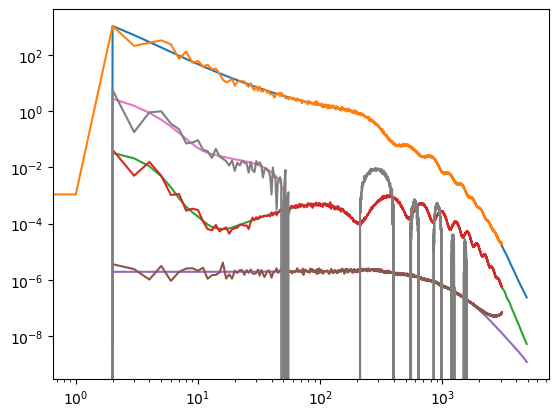

In [5]:
plt.loglog(cl_len['tt'])
plt.loglog(hp.alm2cl(alms[0]))
plt.loglog(cl_len['ee'])
plt.loglog(hp.alm2cl(alms[1]))
plt.loglog(cl_len['bb'])
plt.loglog(hp.alm2cl(alms[2]))
plt.loglog(cl_len['te'])
plt.loglog(hp.alm2cl(alms[0],alms[1]))

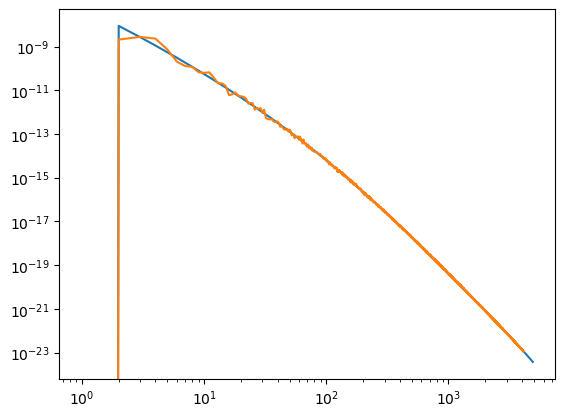

In [6]:
plt.loglog(cl_pot['pp'])
plt.loglog(hp.alm2cl(plm))

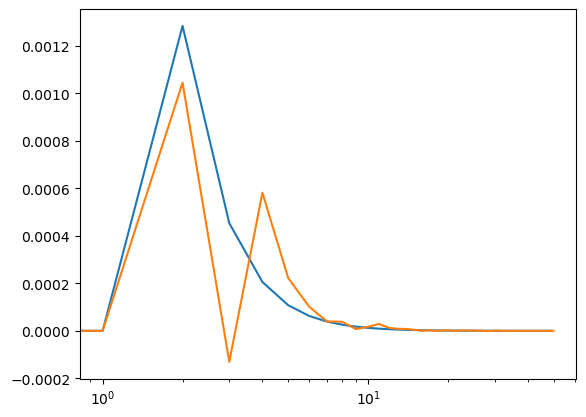

In [7]:
plt.semilogx(cl_pot['pt'][:50])
plt.semilogx(hp.alm2cl(*utils.cut_alms([plm, alms[0]],50)))

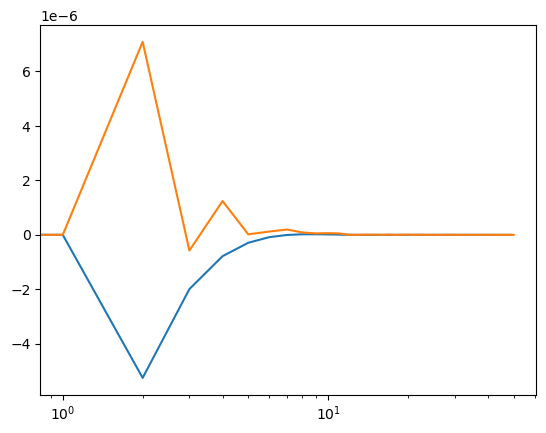

In [8]:
plt.semilogx(cl_pot['pe'][:50])
plt.semilogx(hp.alm2cl(*utils.cut_alms([plm, alms[1]],50)))